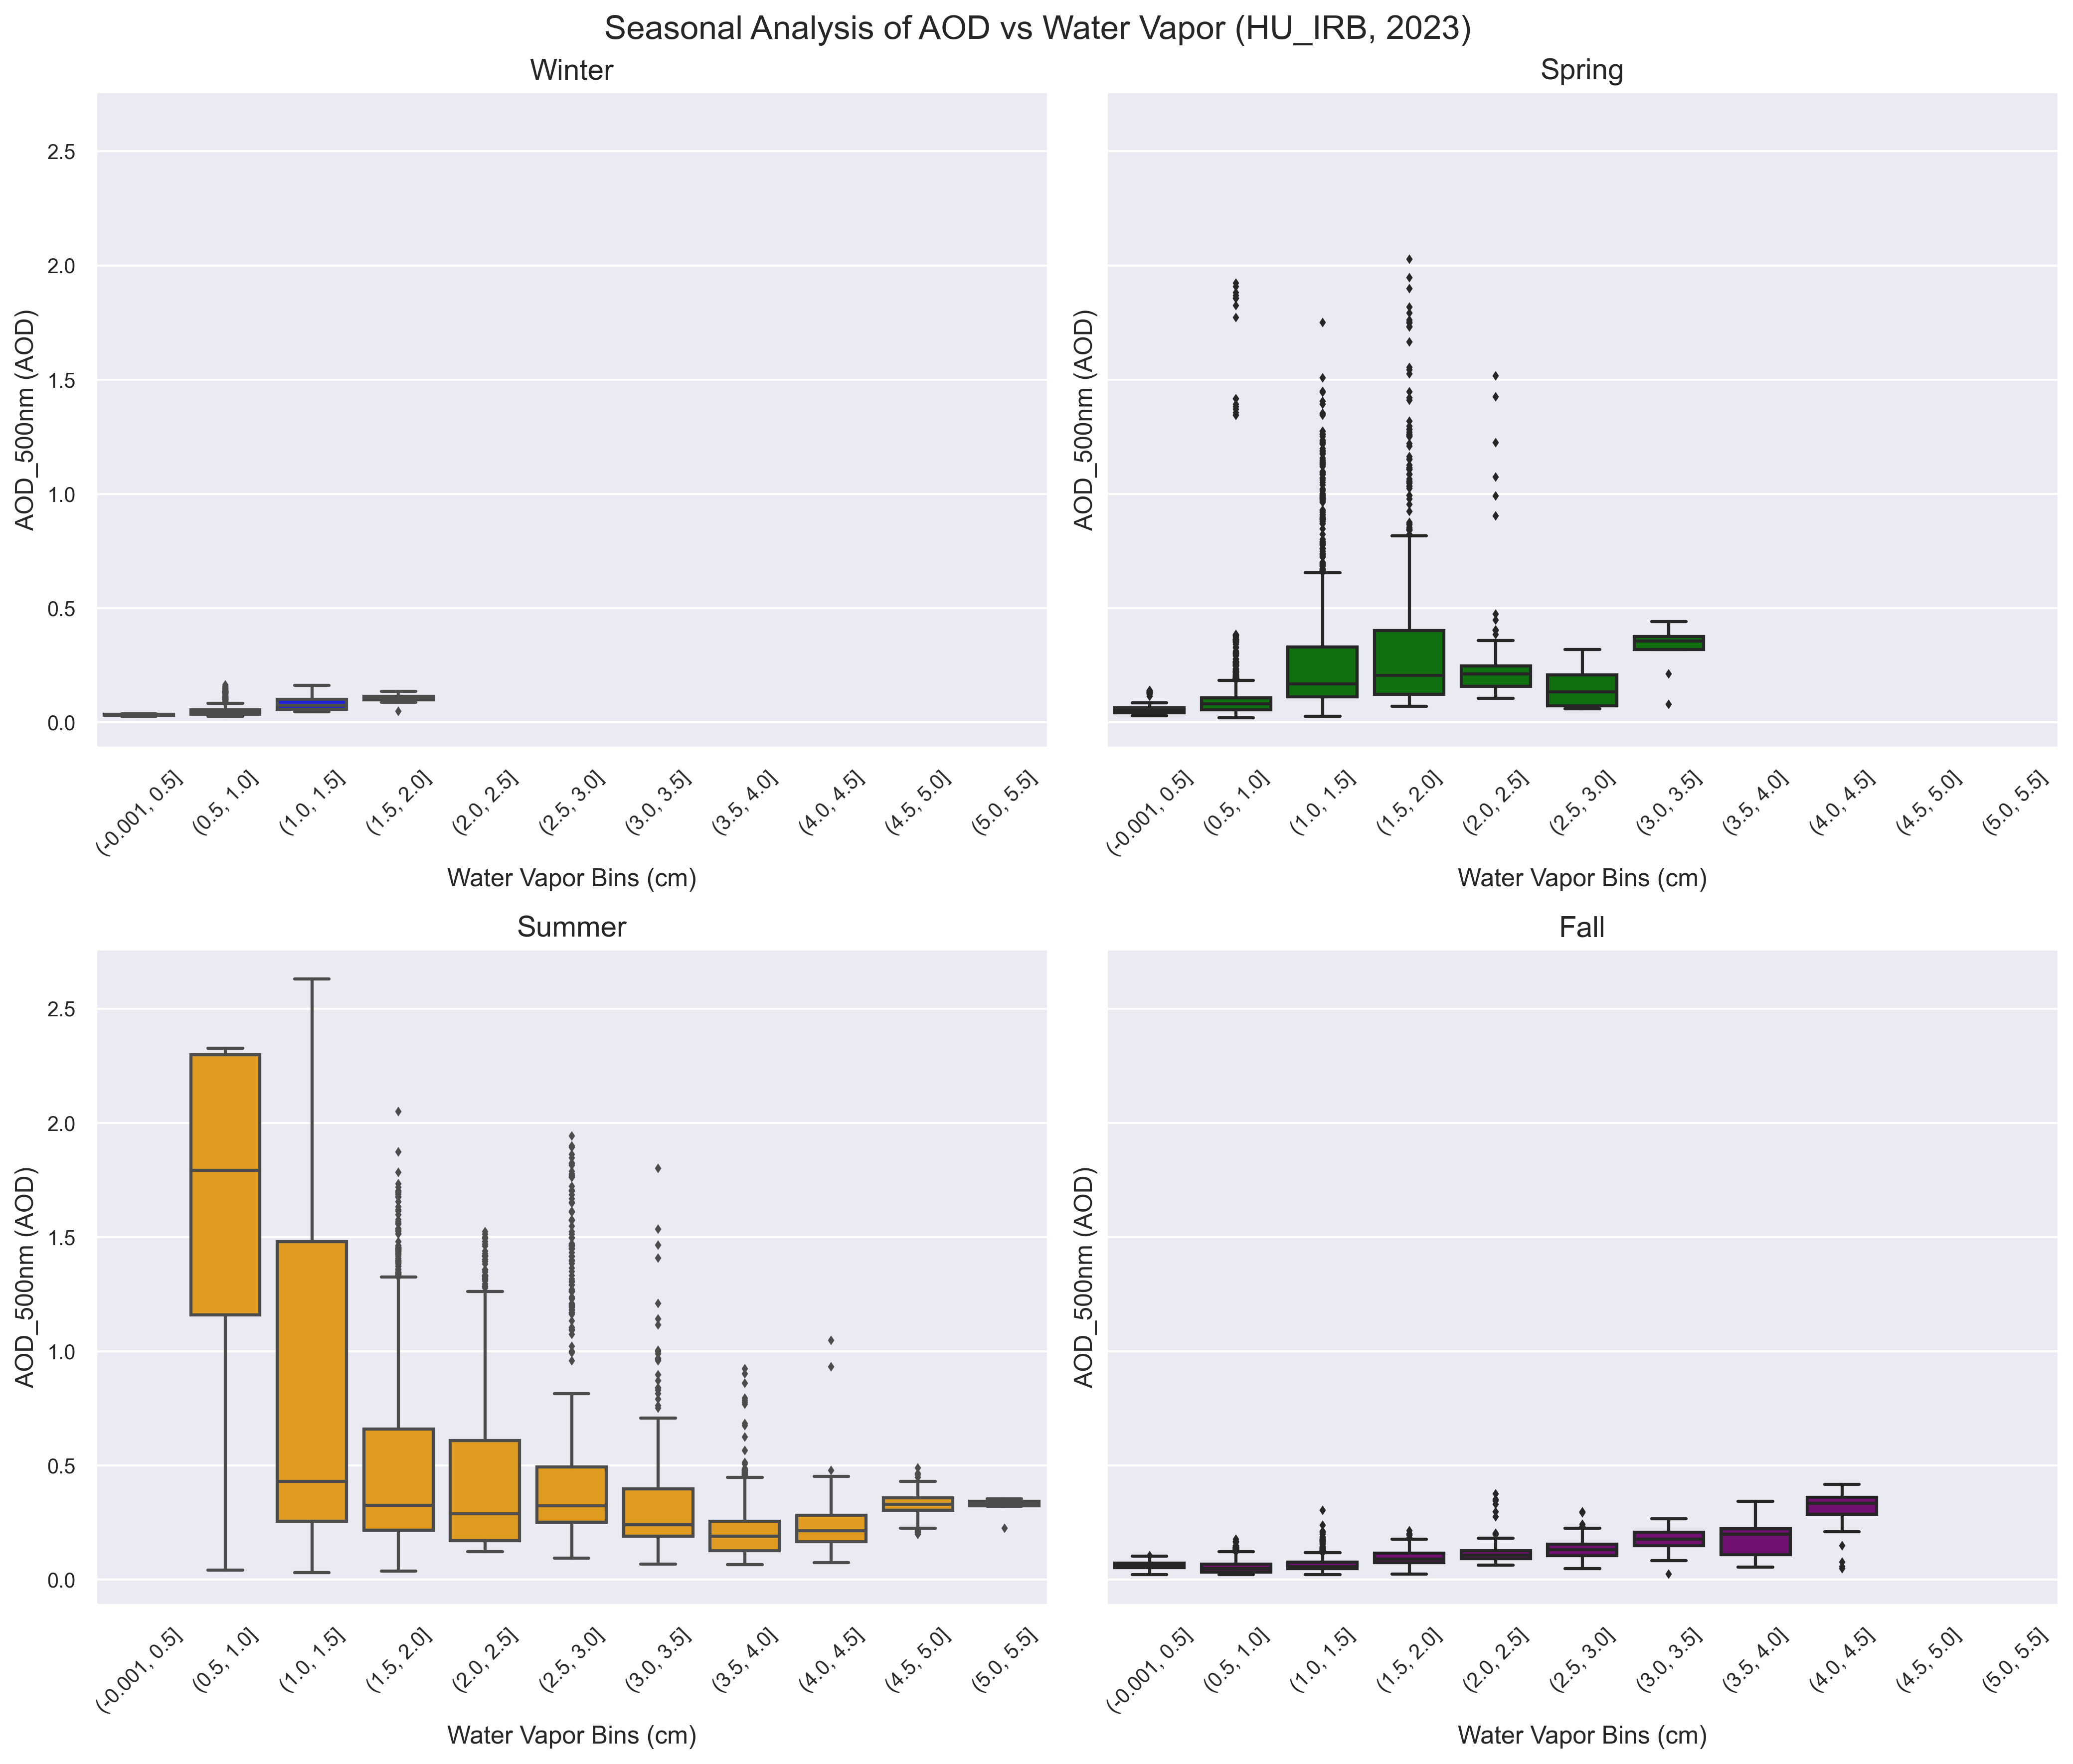

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme(rc={"figure.dpi": 300, 'savefig.dpi': 300})
sns.set_theme(font_scale=0.9)

def plot_aod_wv_correlation(site, year, aod_wavelength="AOD_500nm", bin_width=0.5):
    """
    Plots seasonal boxplots of AOD values binned by Water Vapor levels.

    Parameters:
        site (str): The site name (e.g., "HU_IRB", "GSFC", "SERC").
        year (int): The year of the data.
        aod_wavelength (str): The AOD wavelength column to analyze.
        bin_width (float): The bin width for Water Vapor (default=0.5).
    """
    # Define file path
    data_folder = rf"C:\Users\Sandy\Documents\Aeronet\Data\{site}\Processed"
    file_name = f"{site}_processed_{year}_AOD15_directsun.csv"
    file_path = os.path.join(data_folder, file_name)

    # Read the cleaned data
    df = pd.read_csv(file_path, parse_dates=['DateTime'])

    # Ensure required columns exist
    if aod_wavelength not in df.columns or "Precipitable_Water(cm)" not in df.columns:
        print(f"❌ Error: Required columns not found in the dataset.")
        print(f"Available columns: {df.columns.tolist()}")
        return

    # Drop NaN values before binning
    df_clean = df.dropna(subset=["Precipitable_Water(cm)", aod_wavelength]).copy()

    # Assign seasons based on months
    season_map = {
        12: "Winter", 1: "Winter", 2: "Winter",
        3: "Spring", 4: "Spring", 5: "Spring",
        6: "Summer", 7: "Summer", 8: "Summer",
        9: "Fall", 10: "Fall", 11: "Fall"
    }
    df_clean["Month"] = df_clean["DateTime"].dt.month
    df_clean["Season"] = df_clean["Month"].map(season_map)

    # Create Water Vapor bins
    df_clean["WV_Bin"] = pd.cut(df_clean["Precipitable_Water(cm)"], 
                                bins=np.arange(0, df_clean["Precipitable_Water(cm)"].max() + bin_width, bin_width),
                                include_lowest=True)

    # Plot seasonal boxplots
    fig, axes = plt.subplots(2, 2, figsize=(14, 12), sharey=True)
    seasons = ["Winter", "Spring", "Summer", "Fall"]
    colors = ["blue", "green", "orange", "purple"]

    for ax, season, color in zip(axes.flatten(), seasons, colors):
        season_data = df_clean[df_clean["Season"] == season]
        sns.boxplot(ax=ax, data=season_data, x="WV_Bin", y=aod_wavelength, color=color, fliersize=2)
        ax.set_title(f"{season}", fontsize=14)
        ax.set_xlabel("Water Vapor Bins (cm)", fontsize=12)
        ax.set_ylabel(f"{aod_wavelength} (AOD)", fontsize=12)
        ax.tick_params(axis='x', rotation=45)

    fig.suptitle(f"Seasonal Analysis of AOD vs Water Vapor ({site}, {year})", fontsize=16)
    plt.tight_layout()
    plt.show()

# Example usage
plot_aod_wv_correlation("HU_IRB", 2023, aod_wavelength="AOD_500nm", bin_width=0.5)
